In [2]:
# import a csv

import pandas as pd
from pandas import read_csv

url = "../Health_heart_experimental.csv"
dfBase = read_csv(url, sep=',')

print(dfBase.shape)
print("\n")
print(dfBase.info())
#print("\n")
#print(dfBase.head(5))
#print("\n")
#print(dfBase.describe())

(71760, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71760 entries, 0 to 71759
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  71760 non-null  int64  
 1   age         71760 non-null  int64  
 2   sex         71760 non-null  int64  
 3   SysBP       71760 non-null  int64  
 4   DiaBP       71760 non-null  int64  
 5   HR          71760 non-null  int64  
 6   weightKg    71760 non-null  int64  
 7   heightCm    71760 non-null  int64  
 8   BMI         71760 non-null  float64
 9   indication  71760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.5 MB
None


In [3]:
# Limpiamos los datos
import numpy as np
import random

cols = ['age', 'sex', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI', 'indication']
df = dfBase[cols].copy()

### delete empty values because those are no valid


# create categories of BMI
# 0, Underweight < 18.5 | 1, Normal Weight = 18.5 - 24.9 | 2, Overweight = 25 - 29.9 | 3, Obesity = 30 - 34.9 | 4, Extreme Obesity > 34.9
# ??? poner en documento
def process_bmi_category(n):
    if n < 18.5: return 0
    if n >= 18.5 and n < 25: return 1
    if n >= 25 and n < 30: return 2
    if n >= 30 and n < 35: return 3
    if n >= 35: return 4
    return -1

df['bmiCategory'] = df['BMI'].apply(lambda n: process_bmi_category(n))

# Pregnancy
def create_random_pregnancy(el):
    if el['sex'] == 1: return 0
    resp = random.randint(0, 99)
    res = True if resp == 1 else False # 1% probability of pregnancy
    if el['age'] > 13 and el['age'] < 40 and res : return 1
    return 0

df['pregnant'] = df[['sex', 'age']].apply(lambda el: create_random_pregnancy(el), axis=1)

# Breastfeeding
def create_random_breastfeeding(el):
    if el['sex'] == 1: return 0
    resp = random.randint(0, 99)
    res = True if resp == 1 else False # 1% probability of breastfeeding
    if el['age'] > 13 and el['age'] < 40 and res : return 1
    return 0

df['breastfeeding'] = df[['sex', 'age']].apply(lambda el: create_random_breastfeeding(el), axis=1)


# Exercise
def create_random_exercise(el):
    if el['pregnant'] == 1: return 0
    resp = random.randint(0, 99)
    res = True if resp <= 15 else False # 15% probability of exercise
    if el['age'] > 13 and el['age'] < 40 and res : return 1
    return 0

df['exercise'] = df[['pregnant', 'age']].apply(lambda el: create_random_exercise(el), axis=1)


# Water amount
def calculate_water_amount(el):
    quantity_ml = el['weightKg'] * 35
    if el['pregnant'] == 1: quantity_ml += 500
    if el['breastfeeding'] == 1: quantity_ml += 750
    if el['pregnant'] == 1: quantity_ml += 500
    return quantity_ml

df['waterAmount'] = df[['weightKg', 'pregnant', 'breastfeeding', 'exercise']].apply(lambda el: calculate_water_amount(el), axis=1)


# water glasses
def calculate_water_amount(el):
    quantity = el['waterAmount'] / 250
    if quantity < 8: return 8
    return round(quantity)

df['waterGlasses'] = df[['waterAmount']].apply(lambda el: calculate_water_amount(el), axis=1)


#print(df.isin([-200]).any().any())
#print("\n")
#print( df.shape)
#print("\n")
#print(df.info())
print("\n")
print(df.head(5))
# print("\n")
#print(df.describe())



   age  sex  SysBP  DiaBP   HR  weightKg  heightCm   BMI  indication  \
0   64    1    141     96  128        69       147  32.0           1   
1   21    1    109    100  106        48       150  21.0           0   
2   30    0    112     73  126        69       183  21.0           0   
3   35    1    106     90  130        45       149  20.0           0   
4   39    0    140     90  112        92       166  33.0           1   

   bmiCategory  pregnant  breastfeeding  exercise  waterAmount  waterGlasses  
0            3         0              0         0         2415            10  
1            1         0              0         1         1680             8  
2            1         0              0         0         2415            10  
3            1         0              0         0         1575             8  
4            3         0              0         0         3220            13  


In [4]:
# selected cols

df_processed = df.copy()

# all fields
# cols = ['age', 'sex', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI', 'indication', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterAmount', 'waterGlasses']

# all selectable
# cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterAmount', 'waterGlasses']

# selected
cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterGlasses']
df = df[cols].copy()


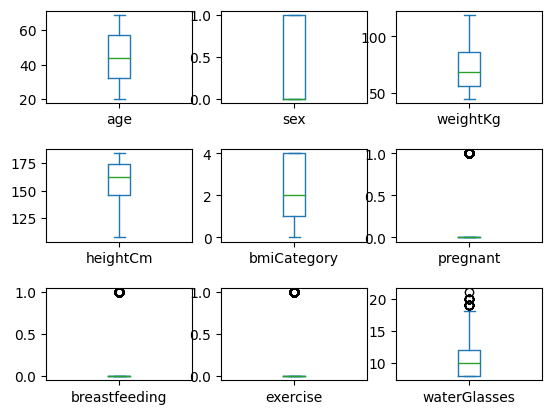

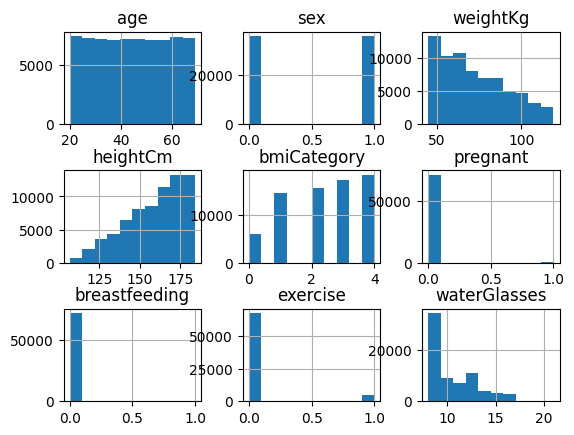

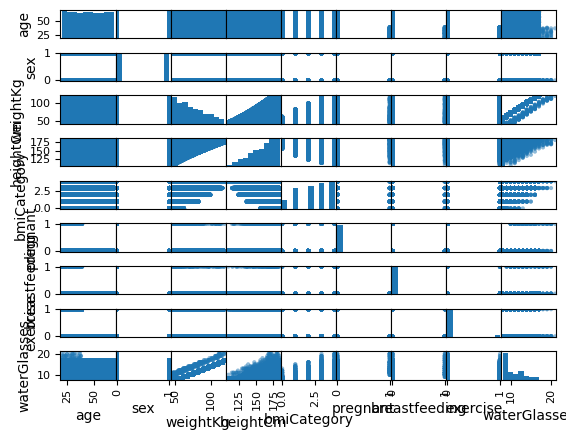

In [5]:
# Load libraries from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt


# gráficos univariable:
# diagramas de caja (box and whisker)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.subplots_adjust(hspace=0.5) 
pyplot.show()

# histogramas
df.hist()
pyplot.subplots_adjust(hspace=0.5) 
pyplot.show()

# gráficos multivariable
# matriz de dispersión
scatter_matrix(df)
pyplot.subplots_adjust(hspace=0.5) 
pyplot.show()

In [6]:
# division de datos

from sklearn.model_selection import train_test_split
array = df.values

# cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterGlasses']
# todos
X = array[:,[0,1,2,3,4,5,6,7]]
# parecidos
y = array[:,8]

print(X)
print("\n")

print(y)
print("\n")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


[[ 64   1  69 ...   0   0   0]
 [ 21   1  48 ...   0   0   1]
 [ 30   0  69 ...   0   0   0]
 ...
 [ 24   1  57 ...   0   0   0]
 [ 42   1 115 ...   0   0   0]
 [ 49   1  81 ...   0   0   0]]


[10  8 10 ...  8 16 11]




# regresión lineal NEURONAL

2.13.0
       age  sex  weightKg  heightCm  bmiCategory  pregnant  breastfeeding  \
24308   22    1        60       171            1         0              0   
33470   44    1        82       177            2         0              0   
25325   62    1        54       167            1         0              0   
45332   65    1        57       157            1         0              0   
32295   65    0        96       179            3         0              0   

       exercise  waterGlasses  
24308         0             8  
33470         0            11  
25325         0             8  
45332         0             8  
32295         0            13  


c:\Users\ricar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


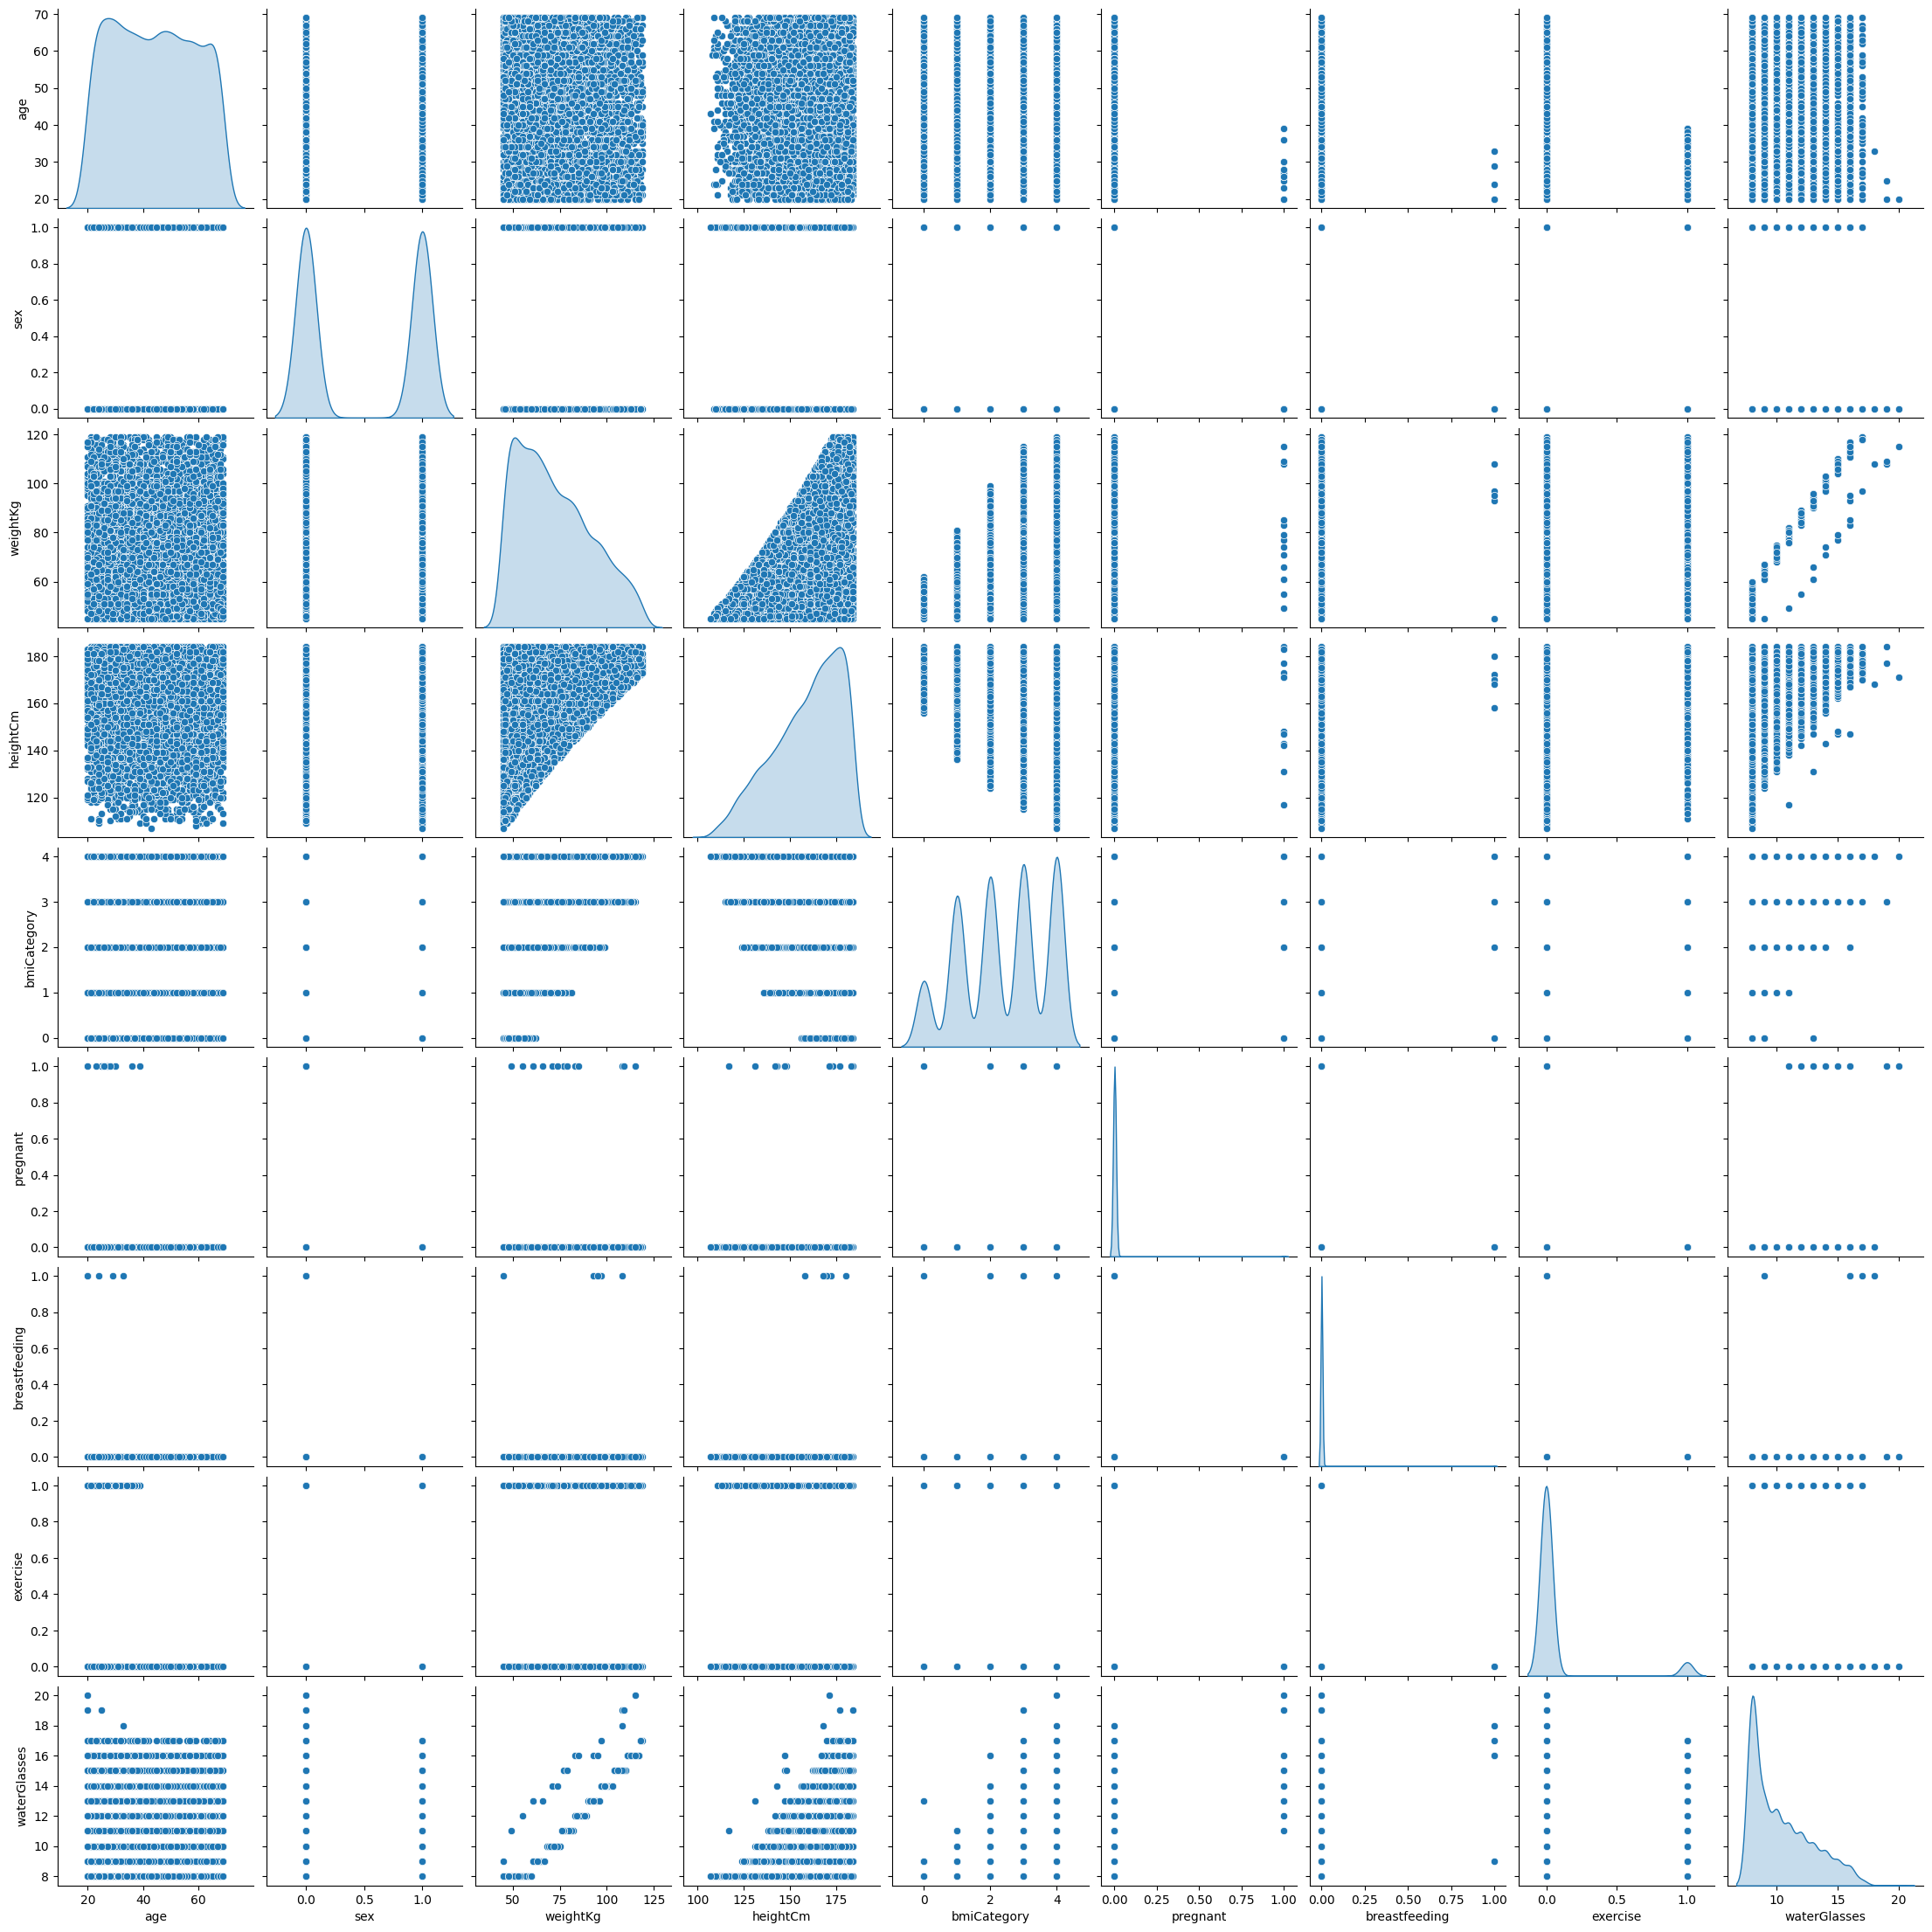

In [7]:
# regresión lineal NEURONAL

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

# Todos
# cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterGlasses']
datasetN = df[cols].copy()
datasetN.head()

# ------ seleccionar solo el 10%
datasetN = datasetN.sample(frac=0.1, random_state=42)  # random_state para reproducibilidad


train_dataset = datasetN.sample(frac=0.8,random_state=0)
test_dataset = datasetN.drop(train_dataset.index)
print(train_dataset.head())


sns.pairplot(train_dataset, diag_kind="kde")


In [8]:
train_stats = train_dataset.describe()
train_stats.pop("waterGlasses")
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
age,5741.0,43.962898,14.515924,20.0,31.0,44.0,57.0,69.0
sex,5741.0,0.495210,0.500021,0.0,0.0,0.0,1.0,1.0
weightKg,5741.0,72.184811,19.415631,45.0,56.0,69.0,86.0,119.0
heightCm,5741.0,158.981362,18.096244,107.0,147.0,163.0,174.0,184.0
bmiCategory,5741.0,2.367880,1.284933,0.0,1.0,2.0,3.0,4.0
pregnant,5741.0,0.002439,0.049326,0.0,0.0,0.0,0.0,1.0
breastfeeding,5741.0,0.000871,0.029501,0.0,0.0,0.0,0.0,1.0
exercise,5741.0,0.066713,0.249546,0.0,0.0,0.0,0.0,1.0


In [9]:
train_labels = train_dataset.pop('waterGlasses')
test_labels = test_dataset.pop('waterGlasses')

In [10]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
#normed_train_data = train_dataset
#normed_test_data = test_dataset

In [11]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='softsign', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='softsign'),
    layers.Dense(64, activation='softsign'),
    layers.Dense(1)
  ])
  # relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
  # 64,128,64,1    2.5
  # 6,64,32,128
  # 128,256,64,32,16   XXX
  # 8,32,128     3
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


model = build_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17217 (67.25 KB)
Trainable params: 17217 (67.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result


1/1 [==============================] - 0s 252ms/step


array([[ 0.26593095],
       [-0.0129038 ],
       [-0.36944744],
       [-0.3325324 ],
       [-0.11349493],
       [-0.16406639],
       [-0.22549705],
       [ 0.33586103],
       [-0.337362  ],
       [ 0.2443337 ]], dtype=float32)

In [14]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.004497,0.040804,0.004497,0.057166,0.051542,0.057166,995
996,0.003720,0.037812,0.003720,0.055865,0.067921,0.055865,996
997,0.003749,0.039161,0.003749,0.054097,0.037752,0.054097,997
998,0.003780,0.039851,0.003780,0.055772,0.066219,0.055772,998
999,0.003850,0.038586,0.003850,0.050485,0.045807,0.050485,999


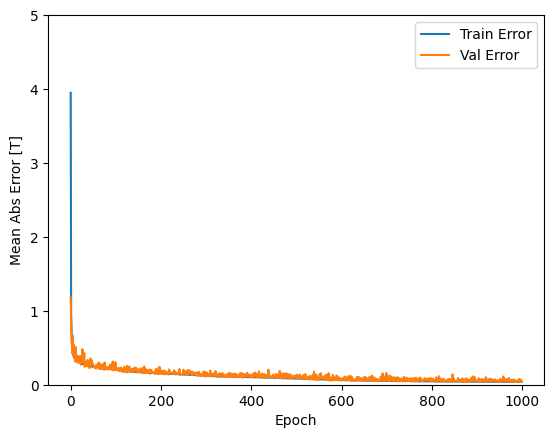

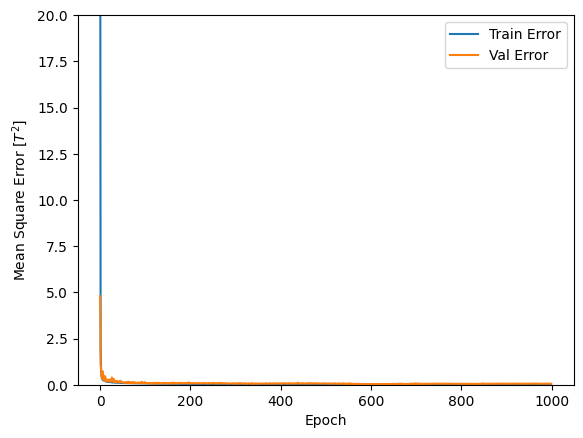

In [16]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [T]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$T^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)



............................................................

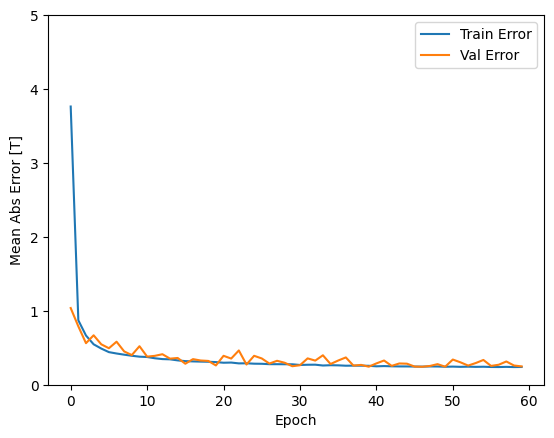

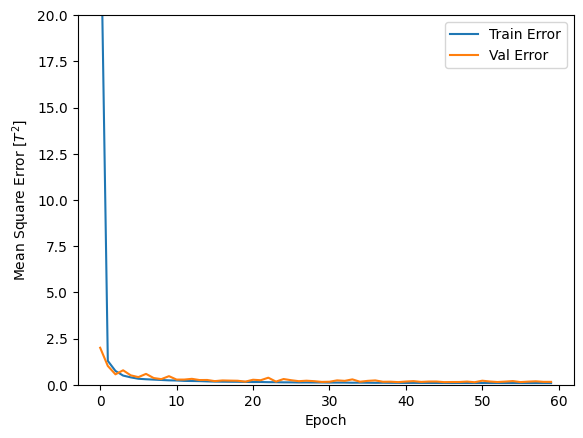

In [17]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [18]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} T".format(mae))

45/45 - 0s - loss: 0.1411 - mae: 0.2510 - mse: 0.1411 - 53ms/epoch - 1ms/step
Testing set Mean Abs Error:  0.25 T


45/45 [==============================] - 0s 742us/step


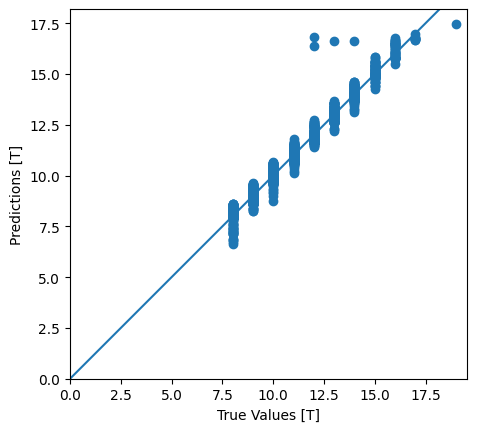

In [19]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])



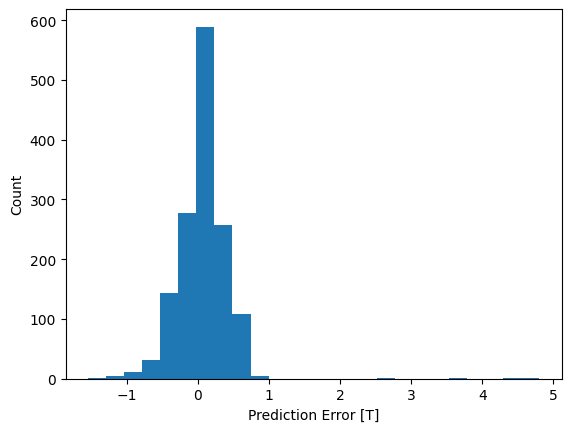

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [T]")
_ = plt.ylabel("Count")